In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load the data
file_path = '/Users/yeshwanthsatyadev/Downloads/glass.csv'
glass_data = pd.read_csv(file_path)

In [3]:
# Exploratory Data Analysis (EDA)
# Display summary statistics, check for missing values, etc.
print(glass_data.info())
print(glass_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.

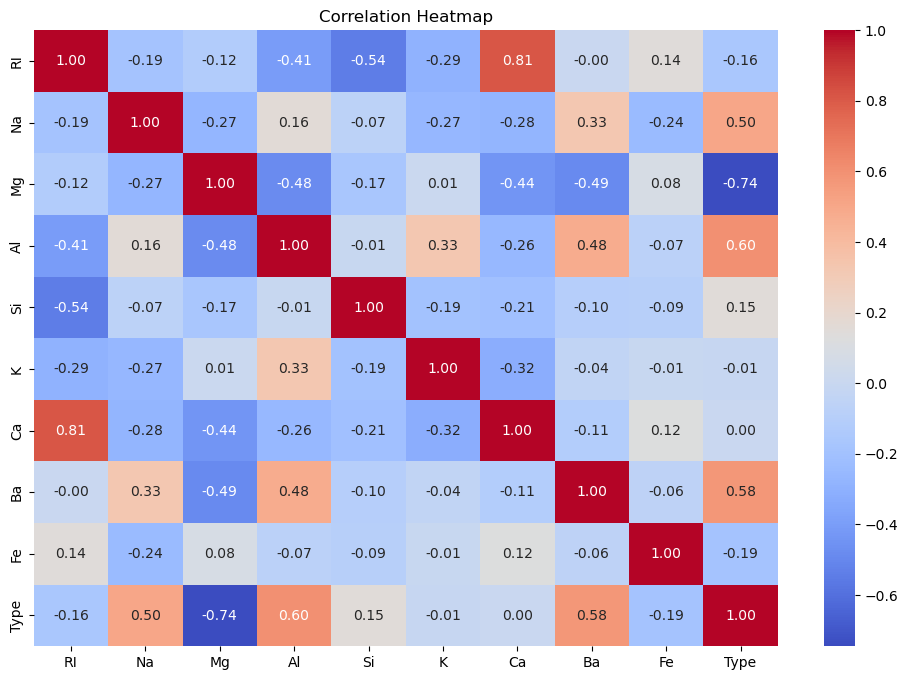

In [4]:
# Visualizations
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(glass_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

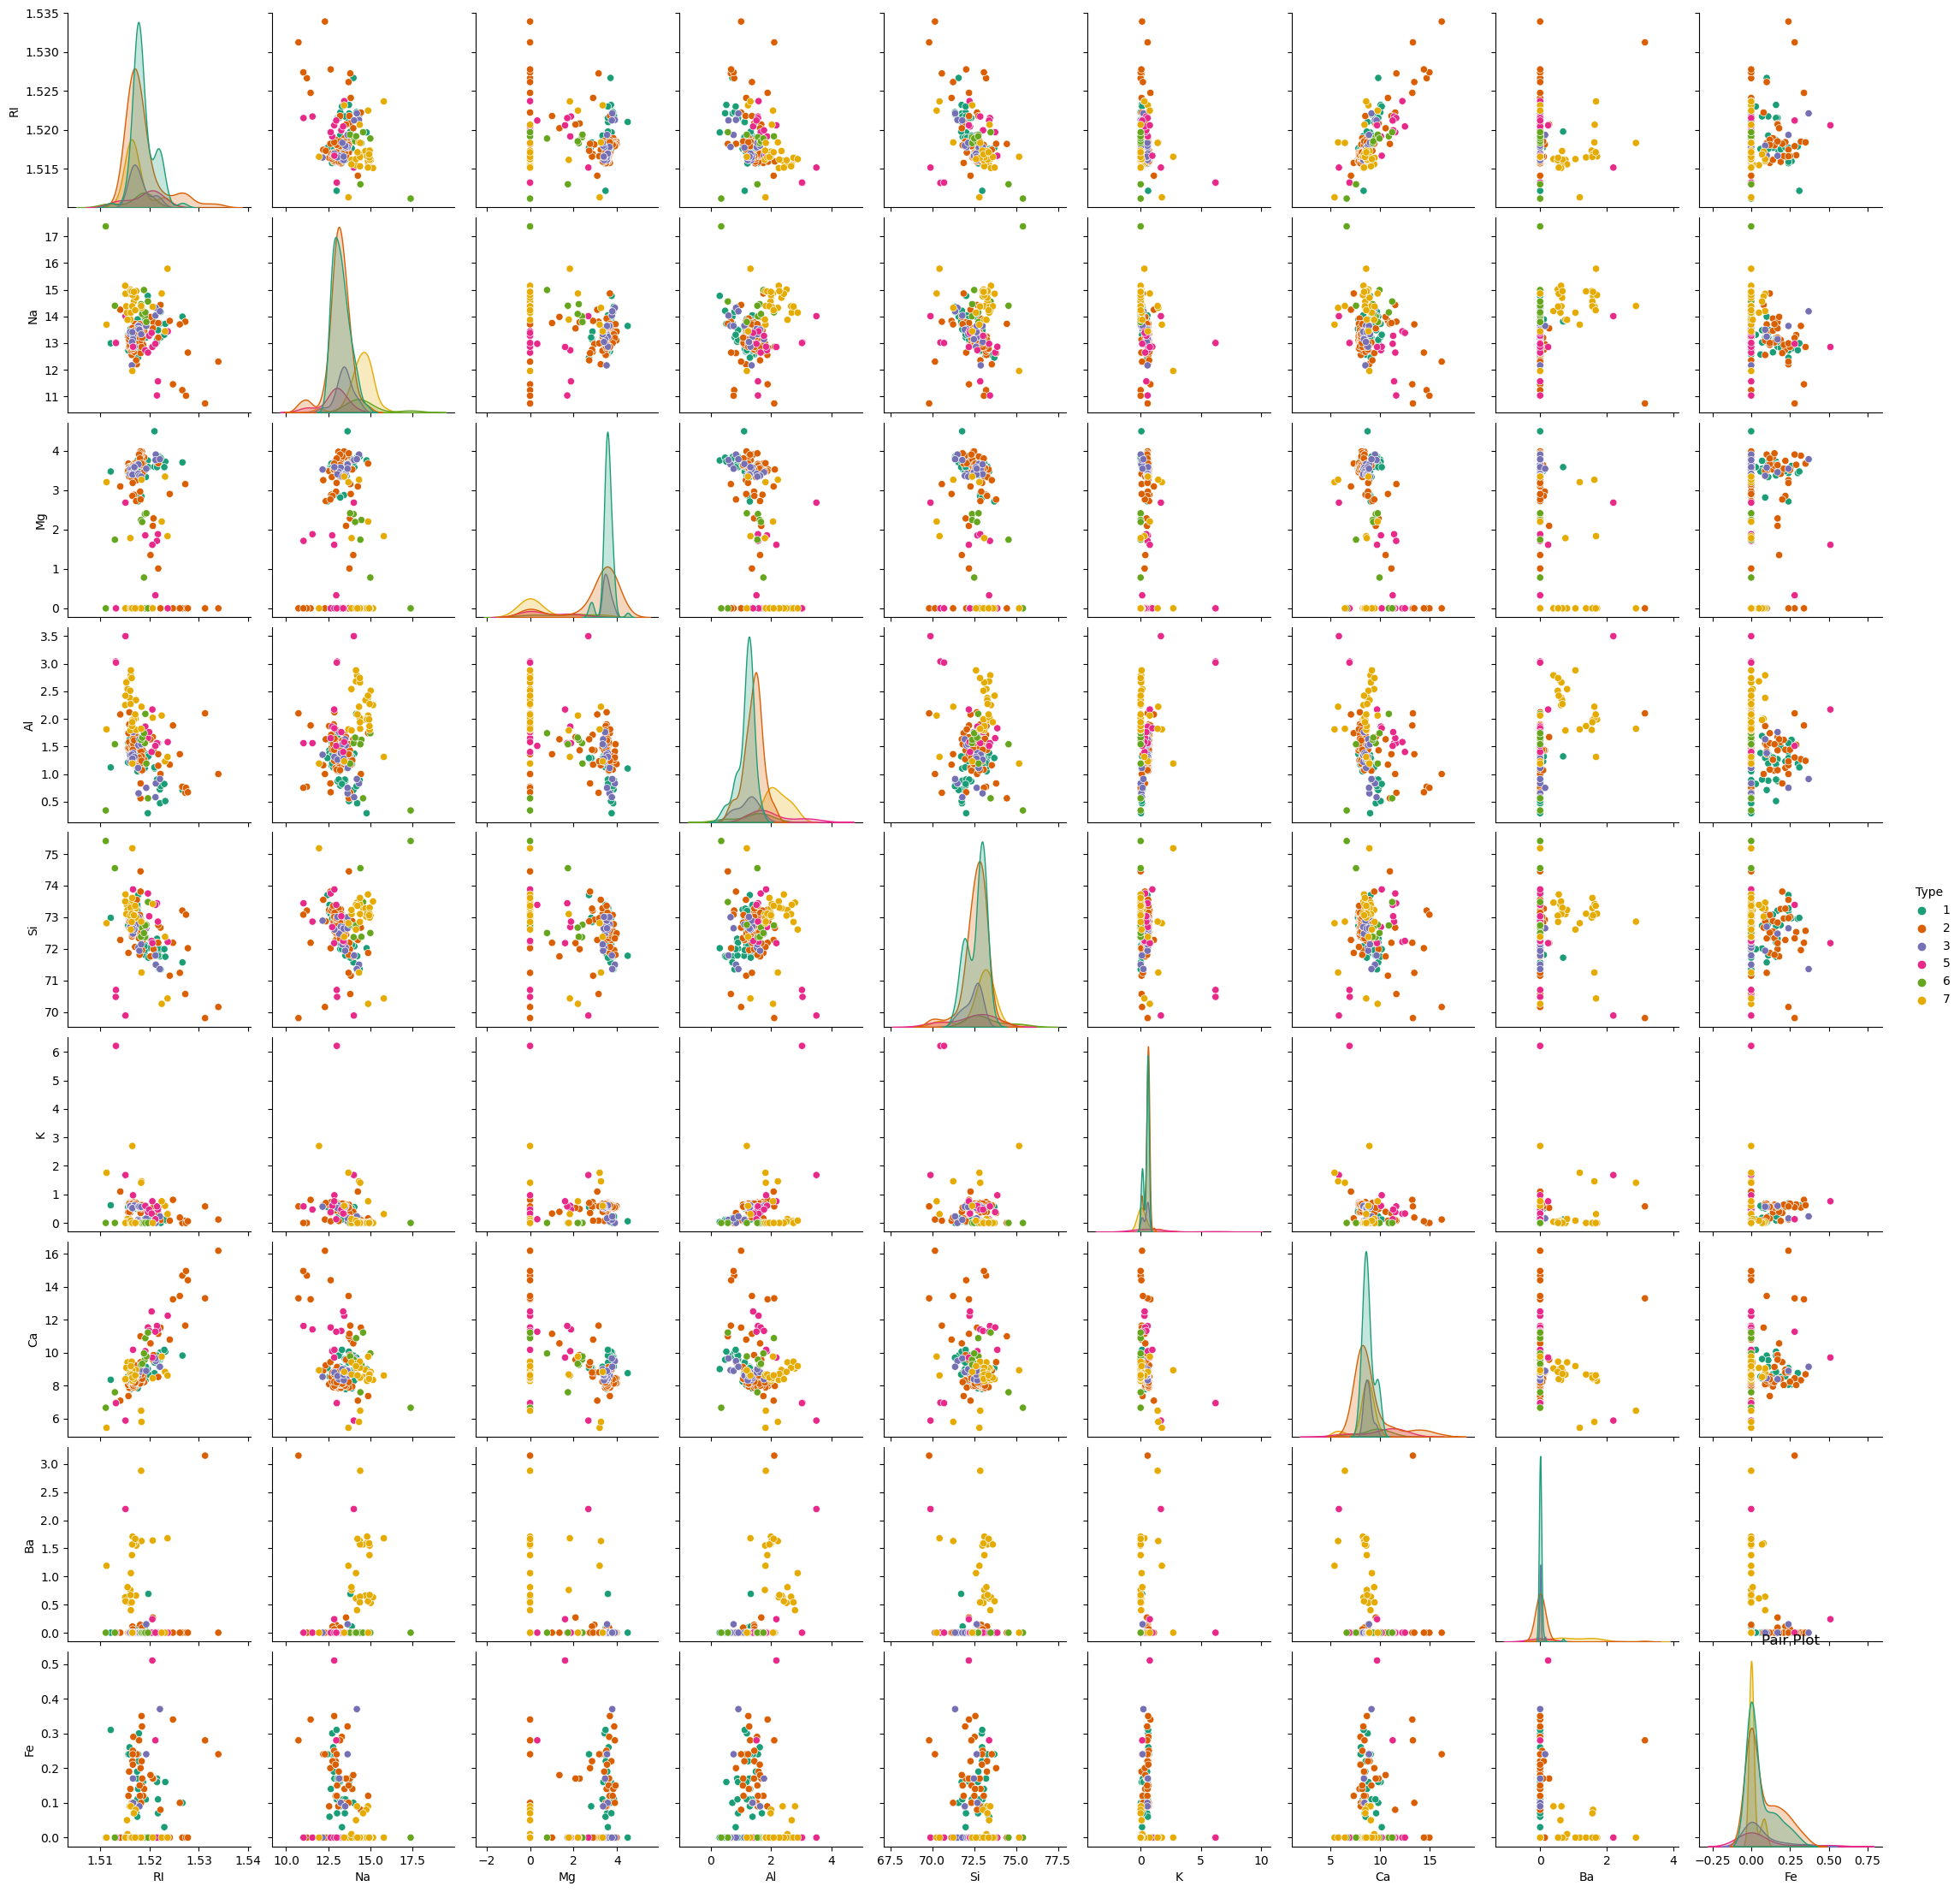

In [5]:
# Pair plot
sns.pairplot(glass_data, hue='Type', palette='Dark2')
plt.title('Pair Plot')
plt.show()

In [6]:
# Principal Component Analysis (PCA) for dimensionality reduction
X = glass_data.drop('Type', axis=1)
y = glass_data['Type']

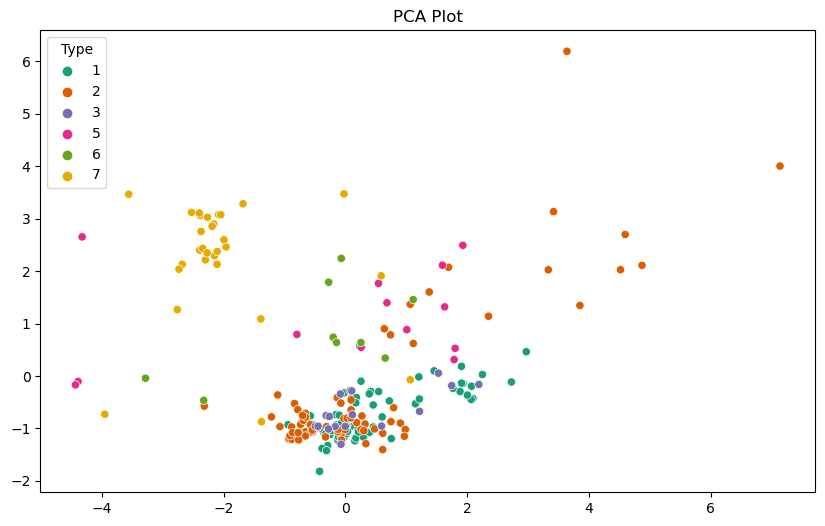

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Dark2')
plt.title('PCA Plot')
plt.show()

In [8]:
# Data Preprocessing
# Split the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Model Training
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Model Evaluation
y_pred = knn_model.predict(X_test)

In [10]:
# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7674418604651163
Confusion Matrix:
 [[ 9  2  0  0  0  0]
 [ 3 11  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  1  0  0  2  0]
 [ 0  0  0  0  0  8]]
Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.82      0.72        11
           2       0.69      0.79      0.73        14
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         8

    accuracy                           0.77        43
   macro avg       0.72      0.67      0.69        43
weighted avg       0.74      0.77      0.74        43



/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz